### This notebook is used to train a scikit-learn random forest regression model to predict diatom carbon biomass from environmental and optical parameters. The trained model is saved using pickle, so that it can be loaded and deployed later in deploy_trained_model.ipynb notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# library for save and load scikit-learn models
import pickle

# some example code from:
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [2]:
# Read in data as pandas dataframe and display first 5 rows
data = pd.read_csv('../model_training_data/ifcb_enviro_26Jul2023.csv')
data.head(5)

,enviro_grid_index,cruise,t_avg,t_std,s_avg,s_std,chla_avg,chla_std,chlb_avg,chlb_std,...,chlb_log,chlc_log,ppc_log,psc_log,chlbb_log,bbp532_log,chlb2c_log,chlbb,chlb2c,diatCarb_log10
0,174,1,15.379565,0.015037,33.361638,0.009658,3.036134,0.073602,0.382791,0.016337,...,-0.417038,-0.372212,-0.254414,0.169451,2.890307,-2.429431,-0.044826,776.796044,0.901933,0.135997
1,181,1,15.227767,0.035458,33.185741,0.014888,4.716638,0.037522,0.600443,0.008299,...,-0.221528,-0.136159,-0.062828,0.348987,3.014347,-2.359437,-0.085369,1033.587328,0.821543,1.073820
2,196,1,15.040281,0.007821,33.254836,0.000617,2.800934,0.046619,0.319163,0.001315,...,-0.495988,-0.426783,-0.236449,0.150757,2.770050,-2.346608,-0.069205,588.910931,0.852698,0.680539
3,203,1,14.741559,0.029090,32.983054,0.061902,2.165557,0.095339,0.277416,0.022504,...,-0.556868,-0.500465,-0.397578,0.029491,2.742604,-2.441786,-0.056403,552.845289,0.878208,0.441662
4,211,1,14.567237,0.017287,32.982505,0.035529,2.637895,0.040919,0.308879,0.006489,...,-0.510212,-0.412711,-0.290288,0.113209,2.773040,-2.378860,-0.097501,592.979368,0.798912,0.425136


In [3]:
data

,enviro_grid_index,cruise,t_avg,t_std,s_avg,s_std,chla_avg,chla_std,chlb_avg,chlb_std,...,chlb_log,chlc_log,ppc_log,psc_log,chlbb_log,bbp532_log,chlb2c_log,chlbb,chlb2c,diatCarb_log10
0,174,1,15.379565,0.015037,33.361638,0.009658,3.036134,0.073602,0.382791,0.016337,...,-0.417038,-0.372212,-0.254414,0.169451,2.890307,-2.429431,-0.044826,776.796044,0.901933,0.135997
1,181,1,15.227767,0.035458,33.185741,0.014888,4.716638,0.037522,0.600443,0.008299,...,-0.221528,-0.136159,-0.062828,0.348987,3.014347,-2.359437,-0.085369,1033.587328,0.821543,1.073820
2,196,1,15.040281,0.007821,33.254836,0.000617,2.800934,0.046619,0.319163,0.001315,...,-0.495988,-0.426783,-0.236449,0.150757,2.770050,-2.346608,-0.069205,588.910931,0.852698,0.680539
3,203,1,14.741559,0.029090,32.983054,0.061902,2.165557,0.095339,0.277416,0.022504,...,-0.556868,-0.500465,-0.397578,0.029491,2.742604,-2.441786,-0.056403,552.845289,0.878208,0.441662
4,211,1,14.567237,0.017287,32.982505,0.035529,2.637895,0.040919,0.308879,0.006489,...,-0.510212,-0.412711,-0.290288,0.113209,2.773040,-2.378860,-0.097501,592.979368,0.798912,0.425136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,101294,8,14.007938,0.014773,34.859329,0.001180,2.613734,0.022299,0.246030,0.002445,...,-0.609011,-0.455332,-0.305308,-0.034151,NaN,NaN,-0.153679,NaN,0.701973,0.022158
6551,101299,8,14.109504,0.049641,34.855933,0.002464,6.078749,1.465459,0.776812,0.225881,...,-0.109684,-0.042954,0.064734,0.443202,NaN,NaN,-0.066730,NaN,0.857571,0.113777
6552,101305,8,13.797833,0.082510,34.820696,0.003199,25.287404,1.178184,4.354826,0.272359,...,0.638971,0.635266,0.666525,1.134371,NaN,NaN,0.003705,NaN,1.008568,0.101796
6553,101316,8,13.826412,0.068178,34.799279,0.000766,19.998346,0.333792,2.864524,0.081697,...,0.457052,0.529280,0.551496,0.983307,NaN,NaN,-0.072228,NaN,0.846783,1.654914


In [4]:
df = data[['t_avg','chla_avg','bbp532_avg','diatCarb']] #, 'lat','s_avg','chlb_avg','chlc_avg','ppc_avg'

In [5]:
# Remove rows with any NaN or Inf values

# Rename inf or -inf as NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
df.dropna(inplace=True)

/var/folders/g_/tv6zcf195p1dfbn61x_n_mq80000gn/T/ipykernel_38320/3761598809.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/g_/tv6zcf195p1dfbn61x_n_mq80000gn/T/ipykernel_38320/3761598809.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [6]:
# Descriptive statistics for each column
df.describe()

,t_avg,chla_avg,bbp532_avg,diatCarb
count,3531.000000,3531.000000,3531.000000,3531.000000
mean,14.585940,0.717589,0.001730,3.494714
std,4.838493,0.927023,0.001215,7.613691
min,0.092598,0.000277,0.000268,0.000488
25%,12.403414,0.191492,0.000798,0.197750
50%,14.547778,0.421455,0.001283,0.761045
75%,18.111761,0.808798,0.002396,3.209609
max,27.961023,9.857278,0.007606,118.165097


In [7]:
#df['lat'] = df['lat'].abs()

In [8]:
# Diatom carbon are the target of the algorithm (i.e., the values we want to predict)
targets = np.array(df['diatCarb'])

# Remove the labels from the features
# axis 1 refers to the columns
df = df.drop('diatCarb', axis = 1)

# Saving feature names for later use
feature_list = list(df.columns)

# Convert to numpy array
inputs = np.array(df)

In [9]:
# Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (2648, 3)
Training Labels Shape: (2648,)
Testing Features Shape: (883, 3)
Testing Labels Shape: (883,)


In [11]:
# The baseline predictions derived from a linear (log space) relationship between Chl and diatoms
baseline_preds = 1.5*x_test['chla_avg']**1.9

# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))
# Average baseline error:  5.06 degrees.

In [12]:
# Baseline errors, and display average baseline error
baseline_errors = (abs(baseline_preds - y_test))

In [13]:
print('Average baseline error: ', round(np.mean(baseline_errors), 2),' mg m^-3')
print('Median baseline error: ', round(np.median(baseline_errors), 2),' mg m^-3')

Average baseline error:  2.78  mg m^-3
Median baseline error:  0.61  mg m^-3


In [16]:
# standardize the data
scaler = StandardScaler().fit(x_train)
X_train_scaled = pd.DataFrame(scaler.transform(x_train), index=x_train.index.values, columns=x_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(x_test), index=x_test.index.values, columns=x_test.columns.values)

In [19]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, oob_score=True, random_state = 42)

#rf = HistGradientBoostingRegressor(random_state = 42)

# Train the model on training data
rf.fit(x_train, y_train);

In [20]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)

test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print(f'Test data R-2 score: {test_score:>5.3}')
print(f'Test data Spearman correlation: {spearman[0]:.3}')
print(f'Test data Pearson correlation: {pearson[0]:.3}')

Out-of-bag R-2 score estimate: 0.735
Test data R-2 score: 0.643
Test data Spearman correlation: 0.833
Test data Pearson correlation: 0.804


In [21]:
score = rf.score(x_train, y_train)
print("R-squared:", round(score, 3))

R-squared: 0.964


In [22]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)

# Calculate the absolute errors
errors = abs(y_test - predictions)

# Print out the mean and median absolute errors 
print('Mean Absolute Error:', round(np.mean(errors), 2), 'mg m^-3')
print('Median Absolute Error:', round(np.median(errors), 2), 'mg m^-3')

Mean Absolute Error: 1.67 mg m^-3
Median Absolute Error: 0.4 mg m^-3


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / abs(y_test)) * (1/1541)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%')

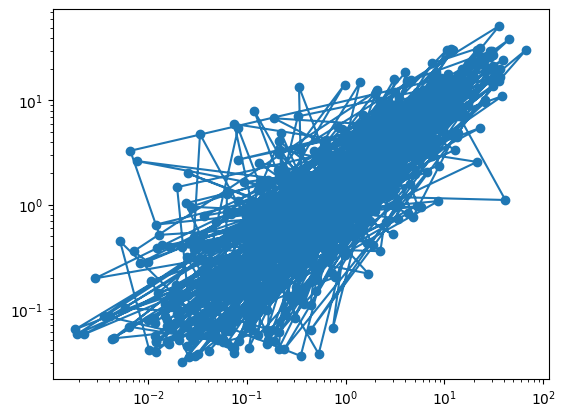

In [29]:
plt.loglog(y_test,predictions,marker='o')

In [31]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: chla_avg             Importance: 0.4
Variable: t_avg                Importance: 0.3
Variable: bbp532_avg           Importance: 0.3


In [32]:
# save model

# file name, can use *.pickle as a file extension
filename = "random_forest.pickle_noLat"

# save model
pickle.dump(rf, open(filename, "wb"))

### model can now be deployed in deploy_trained_model.ipynb